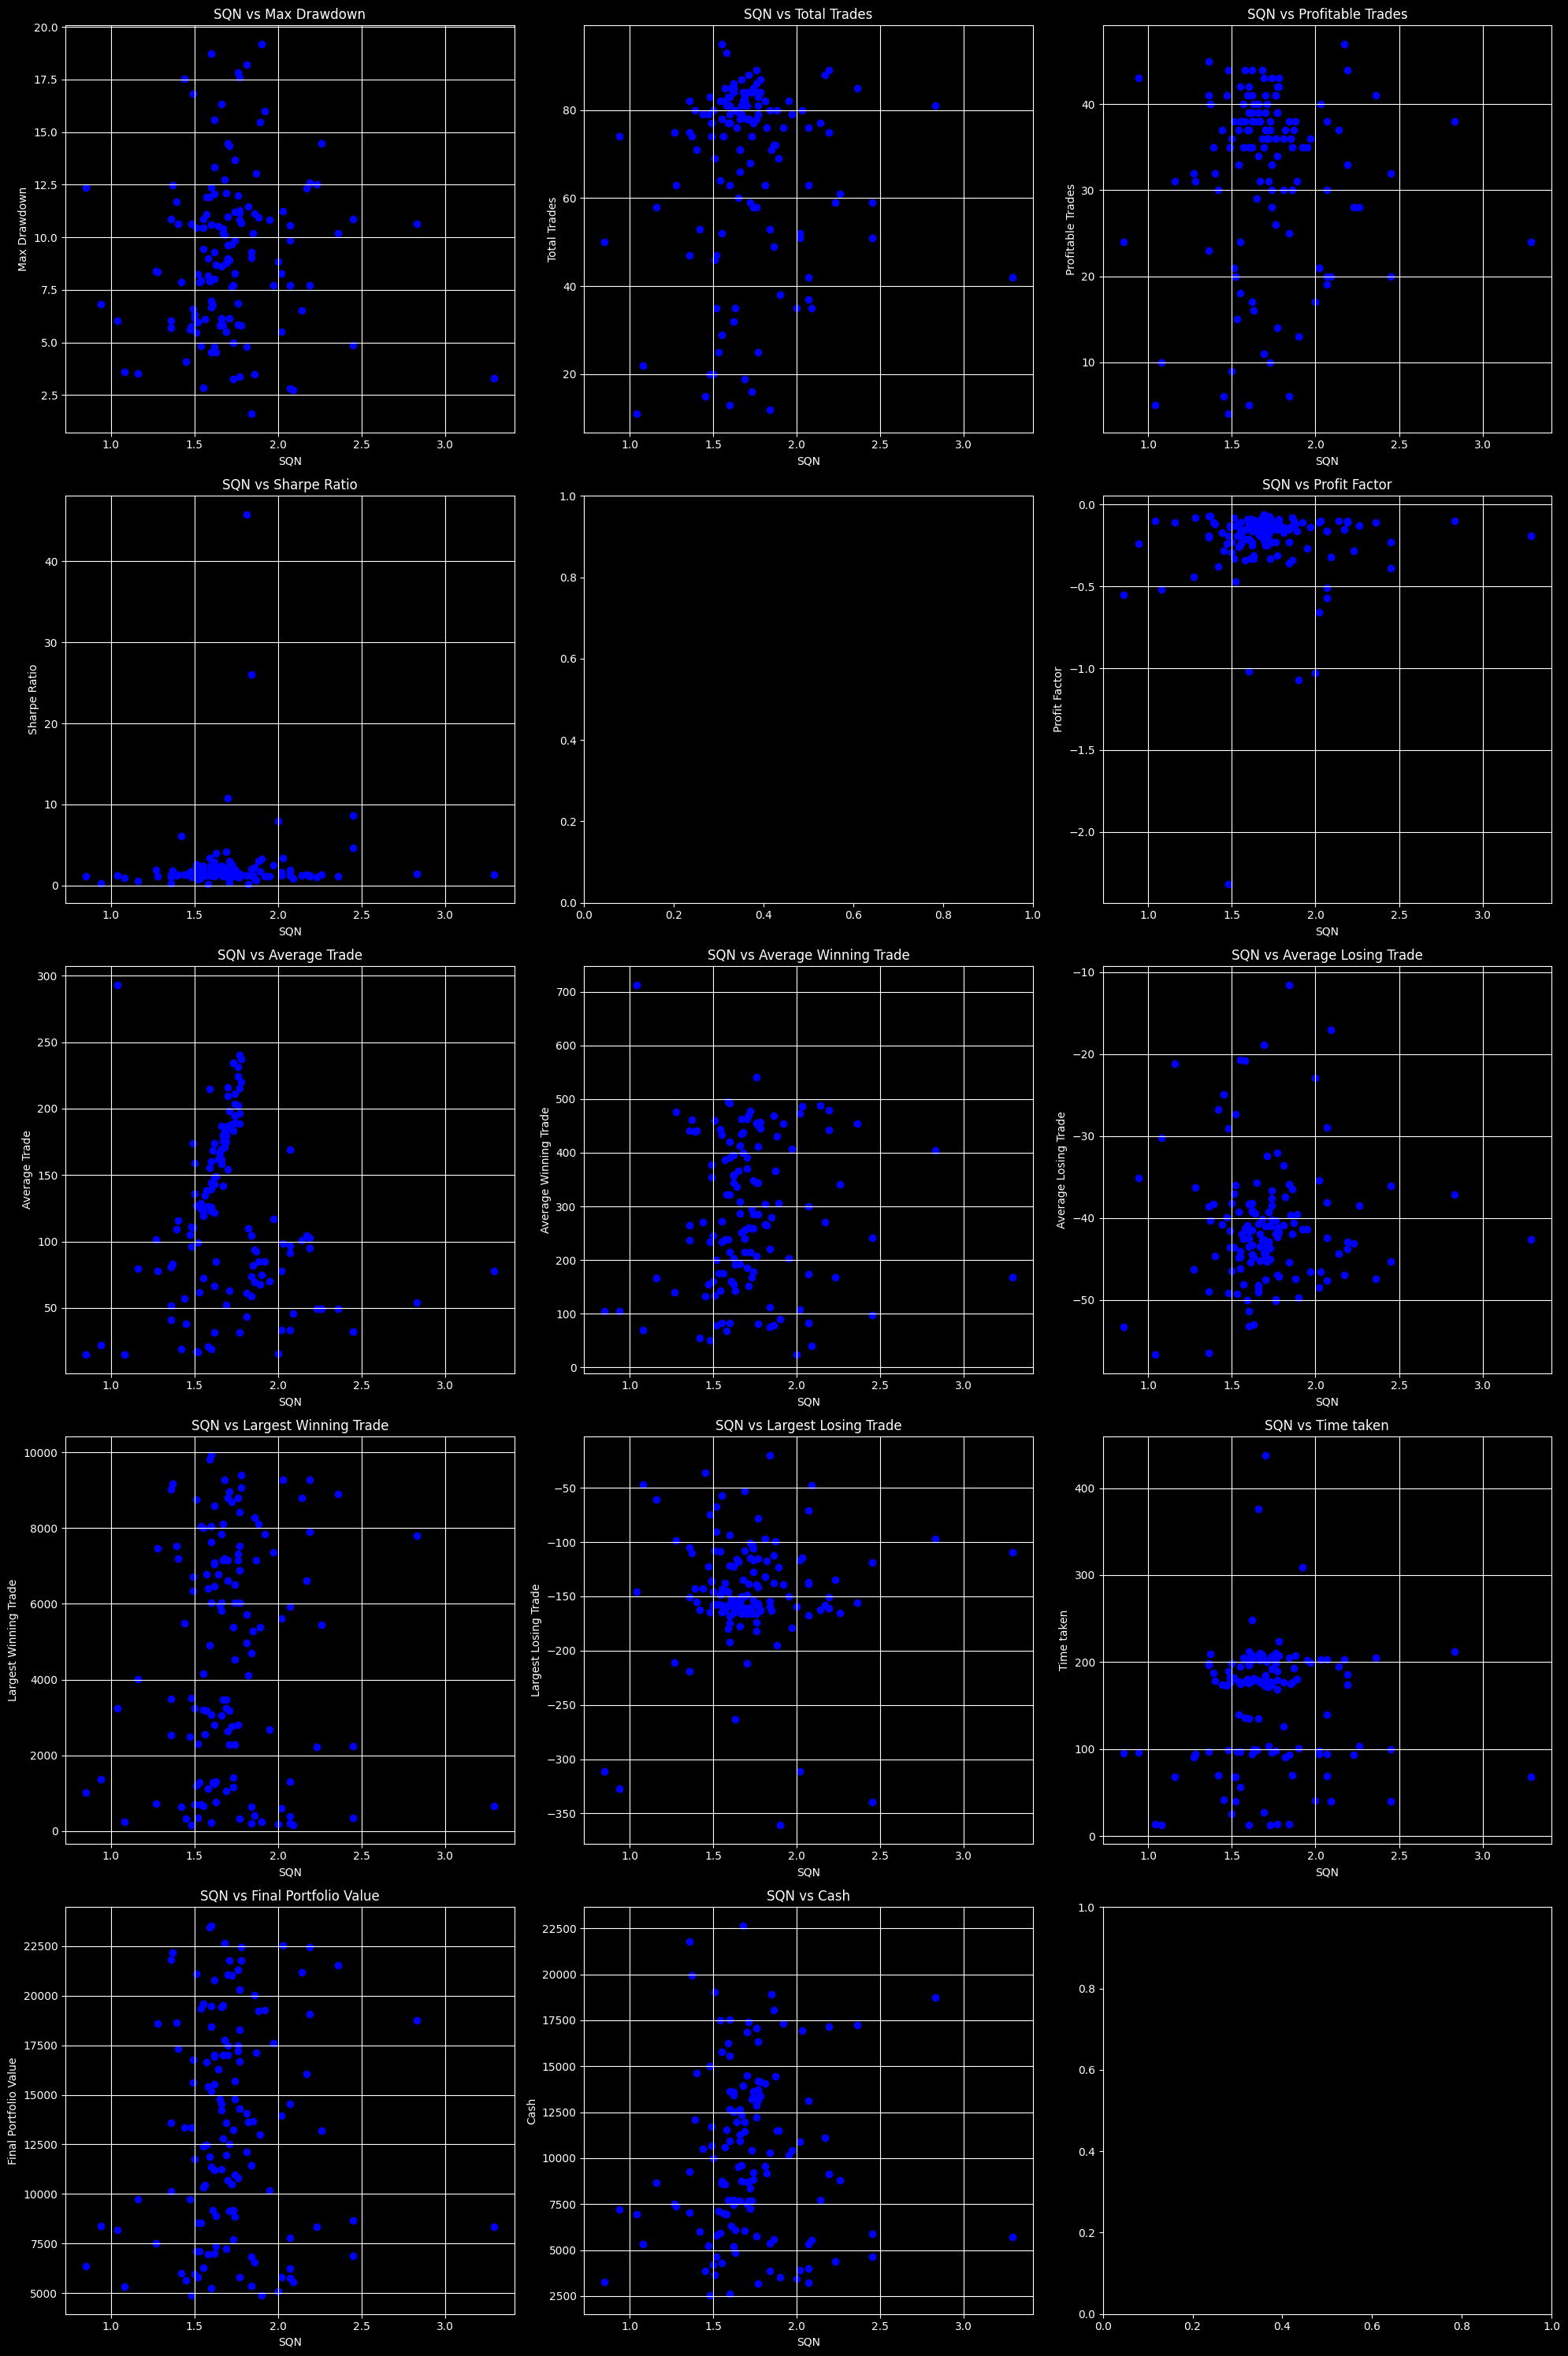

In [4]:
import matplotlib.pyplot as plt
import re
import time
# Path to the log file
log_file_path = "__BrokerLog.log"

# Dictionary to store the data
data = {
    "Max Drawdown": [],
    "Total Trades": [],
    "Profitable Trades": [],
    "Sharpe Ratio": [],
    "SQN": [],
    "Profit Factor": [],
    "Average Trade": [],
    "Average Winning Trade": [],
    "Average Losing Trade": [],
    "Largest Winning Trade": [],
    "Largest Losing Trade": [],
    "Time taken": [],
    "Final Portfolio Value": [],
    "Cash": []
}

# Define regex patterns for each attribute
attribute_patterns = {
    "Max Drawdown": r"Max Drawdown: ([0-9.]+)%",
    "Total Trades": r"Total Trades: ([0-9]+)",
    "Profitable Trades": r"Profitable Trades: ([0-9]+)",
    "Sharpe Ratio": r"Sharpe Ratio: ([0-9.]+)",
    "SQN": r"SQN: ([0-9.]+)",
    "Profit Factor": r"Profit Factor: ([-0-9.]+)",
    "Average Trade": r"Average Trade: ([0-9.]+)",
    "Average Winning Trade": r"Average Winning Trade: ([0-9.]+)",
    "Average Losing Trade": r"Average Losing Trade: ([-0-9.]+)",
    "Largest Winning Trade": r"Largest Winning Trade: ([0-9.]+)",
    "Largest Losing Trade": r"Largest Losing Trade: ([-0-9.]+)",
    "Time taken": r"Time taken: ([0-9.]+) seconds",
    "Final Portfolio Value": r"Final Portfolio Value: \$([0-9,.]+)",
    "Cash": r"Cash: \$([0-9,.]+)"
}

# Read the log file and process each line
with open(log_file_path, 'r') as file:
    for line in file:
        # Check for each attribute and append to the corresponding list
        for attribute, pattern in attribute_patterns.items():
            match = re.search(pattern, line)
            if match:
                value = float(match.group(1).replace(',', '')) if attribute in ["Final Portfolio Value", "Cash"] else float(match.group(1))
                data[attribute].append(value)

# Plotting the data
fig, axs = plt.subplots(5, 3, figsize=(20, 30))  # Corrected subplot grid

for idx, (attribute, values) in enumerate(data.items()):
    if attribute != "SQN":  # Only plot if not SQN vs SQN
        min_length = min(len(values), len(data["SQN"]))
        if min_length > 0:  # Ensure there is data to plot

            ##dark mode this is the only change
            

            ax = axs[idx // 3, idx % 3]  # Corrected subplot indexing
            ax.scatter(data["SQN"][:min_length], values[:min_length], color='blue')
            ax.set_title(f'SQN vs {attribute}')
            ax.set_xlabel('SQN')
            ax.set_ylabel(attribute)
            ax.grid()

fig.tight_layout()
plt.style.use('dark_background')
time.sleep(0.3)
plt.show()


In [1]:
import pandas as pd
import os
import time

def initialize_files_with_data_up_to_2020(source_files, destination_directory):
    for source_file in source_files:
        df = pd.read_parquet(source_file)
        df_initial = df[df['Date'] <= '2020-12-31']
        destination_file = os.path.join(destination_directory, os.path.basename(source_file))
        df_initial.to_parquet(destination_file, index=True)

def slowly_feed_files(source_files, destination_directory, delay=20):
    dataframes = {source_file: pd.read_parquet(source_file) for source_file in source_files}
    file_iterators = {source_file: iter(df.iterrows()) for source_file, df in dataframes.items()}
    
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    initialize_files_with_data_up_to_2020(source_files, destination_directory)
    
    for source_file in source_files:
        file_iterators[source_file] = iter(dataframes[source_file][dataframes[source_file]['Date'] > '2020-12-31'].iterrows())

    try:
        while True:
            all_finished = True
            for source_file in source_files:
                try:
                    index, row = next(file_iterators[source_file])
                    all_finished = False

                    destination_file = os.path.join(destination_directory, os.path.basename(source_file))
                    df_partial = pd.read_parquet(destination_file)
                    
                    df_partial = pd.concat([df_partial, pd.DataFrame([row], columns=df_partial.columns)])
                    
                    df_partial.to_parquet(destination_file, index=True)
                    

                    ##print the data in the last row added to the csv file and round the values to 2 decimal places
                    row.iloc[2] = round(row.iloc[2], 2)
                    print(f"{row.iloc[2]} on {row.iloc[0]}")

                    
                except StopIteration:
                    print(f"Finished feeding all rows from {source_file}")

            if all_finished:
                break

            time.sleep(delay)

    except KeyboardInterrupt:
        print("Stopped feeding files.")

source_files = ['AMD.parquet']
destination_directory = 'Data/RFpredictions'

slowly_feed_files(source_files, destination_directory, delay=5)
print("Finished Adding Data to all files")


96.06 on 2021-01-04 00:00:00
93.21 on 2021-01-05 00:00:00
92.28 on 2021-01-06 00:00:00
95.51 on 2021-01-07 00:00:00
96.4 on 2021-01-08 00:00:00
99.23 on 2021-01-11 00:00:00
98.97 on 2021-01-12 00:00:00
93.89 on 2021-01-13 00:00:00
92.36 on 2021-01-14 00:00:00
91.59 on 2021-01-15 00:00:00
89.58 on 2021-01-19 00:00:00
90.78 on 2021-01-20 00:00:00
92.07 on 2021-01-21 00:00:00
95.95 on 2021-01-22 00:00:00
95.74 on 2021-01-25 00:00:00
95.72 on 2021-01-26 00:00:00
91.88 on 2021-01-27 00:00:00
89.88 on 2021-01-28 00:00:00
88.33 on 2021-01-29 00:00:00
87.95 on 2021-02-01 00:00:00
89.28 on 2021-02-02 00:00:00
89.48 on 2021-02-03 00:00:00
88.6 on 2021-02-04 00:00:00
88.36 on 2021-02-05 00:00:00
91.99 on 2021-02-08 00:00:00
93.3 on 2021-02-09 00:00:00
93.27 on 2021-02-10 00:00:00
93.65 on 2021-02-11 00:00:00
94.22 on 2021-02-12 00:00:00
94.0 on 2021-02-16 00:00:00
90.96 on 2021-02-17 00:00:00
89.6 on 2021-02-18 00:00:00
90.42 on 2021-02-19 00:00:00
88.3 on 2021-02-22 00:00:00
85.11 on 2021-02-23 